# Weather - Py

In [1]:
# import dependencies
from api_keys import api_key
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import datetime

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## List of Cities (from randomly generated latitudes and longitudes)

In [2]:
# Create a set of random lat and lng combinations
# use citipy to identify the city,country that matches the provided coordinates

lats = np.random.uniform(-90.000, 90.000, size=2000)
lngs = np.random.uniform(-180.000, 180.000, size=2000)

lat_lng = list(zip(lats, lngs))

cities = []
countries = []

for coordinate in lat_lng:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    code = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    if city not in cities:
        cities.append(city)
        countries.append(code)

city_country = list(zip(cities, countries))

len(city_country)

769

## Perform API Calls (for each city)

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?"

unit = "imperial" 

query_url = f"{url}appid={api_key}&units={unit}&q="



In [4]:
print ("Beginning data retrieval...")
print ("----------------------------")

# establish lists to store the specified data for each city from the api
found_cities = []
found_countries = []
found_lats = []
found_lngs = []
dates = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

count = 0

for place in city_country:
    
    query = place[0].replace(" ", "+") + "," + place[1].replace(" ", "+")
    
    city_data = requests.get(query_url + query).json()
    
    if city_data["cod"] == "404":
        print(f"Error: '{place[0]}' was not found...skippping")
    

    else:
        count += 1
        print (f"{count}. Processing data for {place[0]}") # print log of each city that was found and is being processed
        print (query_url + query)
        found_cities.append(place[0])
        found_countries.append(place[1])
        dates.append(city_data["dt"])
        cloudiness.append(city_data["clouds"]["all"])
        humidity.append(city_data["main"]["humidity"])
        max_temp.append(city_data["main"]["temp_max"])
        wind_speed.append(city_data["wind"]["speed"])
        found_lats.append(city_data["coord"]["lat"])
        found_lngs.append(city_data["coord"]["lon"])

print ("--------------------------")
print ("Data retrieval complete")
print ("--------------------------")

Beginning data retrieval...
----------------------------
1. Processing data for jamestown
2. Processing data for voh
3. Processing data for nikolskoye
4. Processing data for butaritari
5. Processing data for cape town
6. Processing data for kandrian
7. Processing data for nhulunbuy
8. Processing data for guerrero negro
9. Processing data for quatre cocos
10. Processing data for usinsk
11. Processing data for upata
12. Processing data for vaini
13. Processing data for castro
14. Processing data for sterling
15. Processing data for khatanga
16. Processing data for atuona
17. Processing data for punta arenas
Error: 'ngukurr' was not found...skippping
18. Processing data for lompoc
19. Processing data for ribeira grande
20. Processing data for rikitea
Error: 'laguna' was not found...skippping
21. Processing data for muroto
Error: 'mataura' was not found...skippping
22. Processing data for hasaki
23. Processing data for necochea
24. Processing data for hilo
25. Processing data for bang saph

Error: 'malakal' was not found...skippping
Error: 'alekseyevka' was not found...skippping
206. Processing data for east london
Error: 'belushya guba' was not found...skippping
207. Processing data for leningradskiy
208. Processing data for clyde river
209. Processing data for krizevci
Error: 'atka' was not found...skippping
210. Processing data for lima
211. Processing data for anadyr
212. Processing data for xining
213. Processing data for bambous virieux
214. Processing data for bitkine
215. Processing data for manzhouli
216. Processing data for kununurra
Error: 'vestbygda' was not found...skippping
Error: 'formoso do araguaia' was not found...skippping
Error: 'lasa' was not found...skippping
217. Processing data for san cristobal
218. Processing data for yerbogachen
219. Processing data for maceio
220. Processing data for sao joao da barra
Error: 'kismayo' was not found...skippping
221. Processing data for homer
Error: 'urumqi' was not found...skippping
Error: 'humaita' was not foun

400. Processing data for atambua
401. Processing data for tura
402. Processing data for upernavik
403. Processing data for novosil
404. Processing data for marsabit
405. Processing data for la ronge
406. Processing data for vestmannaeyjar
407. Processing data for ban nahin
408. Processing data for suhbaatar
409. Processing data for namatanai
410. Processing data for mogadishu
411. Processing data for kamogawa
412. Processing data for aguada de cima
413. Processing data for general roca
414. Processing data for dhidhdhoo
415. Processing data for igrim
416. Processing data for belaya gora
417. Processing data for celestun
418. Processing data for demba
419. Processing data for kulhudhuffushi
420. Processing data for mizdah
421. Processing data for kupang
422. Processing data for tumen
423. Processing data for abu kamal
Error: 'tukrah' was not found...skippping
424. Processing data for ulaanbaatar
425. Processing data for ouargaye
426. Processing data for dese
427. Processing data for kyz

602. Processing data for nalut
603. Processing data for pedro juan caballero
604. Processing data for narsaq
605. Processing data for pankrushikha
Error: 'dagana' was not found...skippping
606. Processing data for omboue
607. Processing data for acajutla
608. Processing data for ribnitz-damgarten
609. Processing data for baykit
610. Processing data for kanniyakumari
611. Processing data for jalu
612. Processing data for potiskum
613. Processing data for polis
614. Processing data for guisa
615. Processing data for movila
Error: 'tabiauea' was not found...skippping
616. Processing data for plettenberg bay
617. Processing data for kisangani
618. Processing data for marawi
619. Processing data for ardmore
620. Processing data for moshupa
621. Processing data for chililabombwe
Error: 'saint-georges' was not found...skippping
622. Processing data for newport
623. Processing data for arenillas
624. Processing data for jacareacanga
625. Processing data for paamiut
626. Processing data for bel

## DataFrame of each city's weather data

In [17]:
# create dataframe using data from api
weather_df = pd.DataFrame({"City" : found_cities, "Country" : found_countries, "Date" : dates,
                   "Lat" : found_lats, "Lng" : found_lngs, "Max Temp": max_temp, "Humidity" : humidity, 
                   "Cloudiness" : cloudiness, "Wind Speed" : wind_speed})

weather_df.to_csv("../Output/city_weather.csv") # write data frame to csv file and save

weather_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,jamestown,sh,1561262930,-15.94,-5.72,71.03,67,68,13.96
1,voh,nc,1561262931,-20.95,164.69,72.65,82,100,7.63
2,nikolskoye,ru,1561262931,59.70,30.79,57.20,82,0,6.71
3,butaritari,ki,1561262931,3.07,172.79,85.07,73,74,9.10
4,cape town,za,1561262932,-33.93,18.42,59.00,80,0,15.32


In [18]:
weather_df.count() # verify that a sufficient sample size was generated

City          667
Country       667
Date          667
Lat           667
Lng           667
Max Temp      667
Humidity      667
Cloudiness    667
Wind Speed    667
dtype: int64

In [7]:
# date of analysis/ date of last run (api is for 'current' weather data)

readable_date = datetime.datetime.utcfromtimestamp(weather_df["Date"][0]).strftime("%m/%d/%y")



## Temperature v Latitude

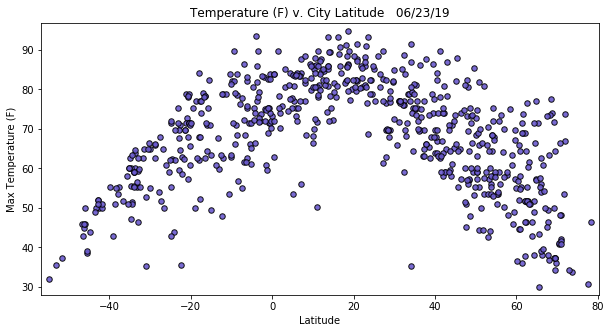

In [13]:
# create scatter plot of the relationship between temperature and latitude
plt.figure(figsize = (10,5))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 30);

plt.title("Temperature (F) v. City Latitude   " + readable_date );
plt.ylabel("Max Temperature (F)");
plt.xlabel("Latitude");


plt.ylim(weather_df["Max Temp"].min() - 2, weather_df["Max Temp"].max() + 2)
plt.xlim(weather_df["Lat"].min() - 2, weather_df["Lat"].max() + 2)
         
plt.savefig("../Images/temp_lat.png")

## Humidity v Latitude

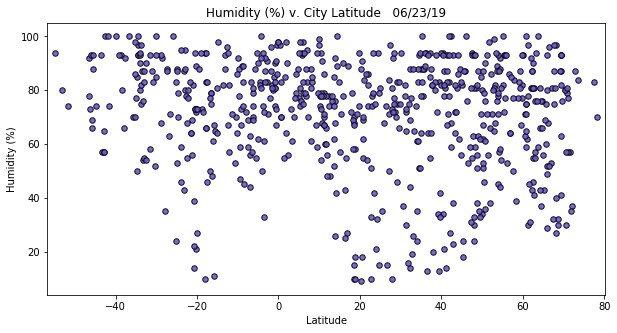

In [12]:
# create scatter plot of the relationship between humidity and latitude
plt.figure(figsize = (10,5))
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 30);


plt.title("Humidity (%) v. City Latitude   " + readable_date);
plt.ylabel("Humidity (%)");
plt.xlabel("Latitude");

plt.ylim(weather_df["Humidity"].min() - 5, weather_df["Humidity"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 2, weather_df["Lat"].max() + 2)

plt.savefig("../Images/humidity_lat.png")


## Cloudiness v Latitude

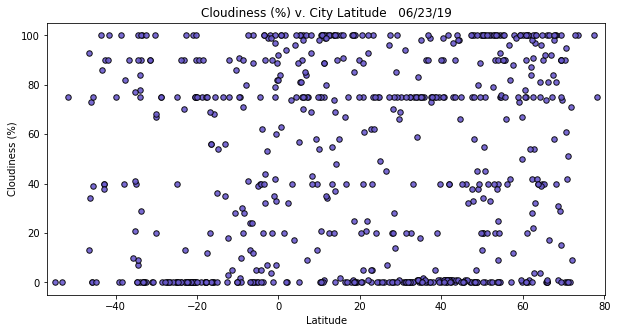

In [14]:
# create scatter plot of the relationship between cloudiness and latitude
plt.figure(figsize = (10,5))
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 30);


plt.title("Cloudiness (%) v. City Latitude   " + readable_date);
plt.ylabel("Cloudiness (%)");
plt.xlabel("Latitude");


plt.ylim(weather_df["Cloudiness"].min() - 5, weather_df["Cloudiness"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 2, weather_df["Lat"].max() + 2)

plt.savefig("../Images/clouds_lat.png")

## Wind Speed v Latitude

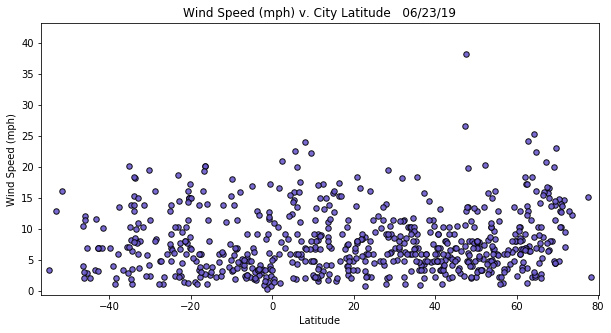

In [15]:
# create scatter plot of the relationship between wind speed and latitude
plt.figure(figsize = (10,5))
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "slateblue", edgecolor = "black", alpha = .9, s = 30);


plt.title("Wind Speed (mph) v. City Latitude   " + readable_date);
plt.ylabel("Wind Speed (mph)");
plt.xlabel("Latitude");

plt.ylim(weather_df["Wind Speed"].min() - 1, weather_df["Wind Speed"].max() + 5)
plt.xlim(weather_df["Lat"].min() - 2, weather_df["Lat"].max() + 2)

plt.savefig("../Images/wind_lat.png")